# Basic Machine Learning

Machine Learning Tasks

* Supervised
  * Regression
  * Classification
  * Localization
  * Object Detection
  * Semantic Segmentation
  * Instance Segmentation
* Unsupervised
  * Clustering

![image.png](pic1.png)

Link AG2PI

## Packages

* Scipy
* Sklearn

---

## Linear Regression 

* what 
  * Fit a line through some points
* why
  * Find relations between independen and dependent variables.
  * We have low resolution data points and want to query on the missing parts.

## R-squared

* Goodness of fit
* percentage of the variance in the dependent variable that the independent variables explain collectively

$R^2 = \frac{variance\:explained\:by\:the\:model}{total\:variance}$

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [3]:
n = 50
rng = np.random.default_rng()
x = rng.random(n)
y = 1.6*x + rng.random(n)

print(x)
print(y)

[0.92398973 0.50945719 0.72788913 0.63773766 0.68392426 0.97884435
 0.81213174 0.85353032 0.80053174 0.19052691 0.534871   0.2062054
 0.85262713 0.79811379 0.45078914 0.94524926 0.58260548 0.40388879
 0.65807121 0.79317341 0.11063252 0.52856648 0.45010234 0.9462472
 0.18451744 0.76933471 0.04413032 0.75455575 0.74115655 0.25161283
 0.55806574 0.05662349 0.79594263 0.09841525 0.45161047 0.89217346
 0.77591342 0.20346599 0.09245221 0.82944636 0.87136492 0.10073228
 0.47982225 0.76336173 0.38487296 0.77081317 0.56145646 0.71681874
 0.72044882 0.91719224]
[1.54397064 0.9181022  1.83880496 1.82274383 1.60381765 2.16617721
 2.29284062 2.18223752 1.33350146 0.43078444 1.06027484 0.80401602
 2.3342071  1.3585213  1.56089779 1.97371052 1.3607398  1.13420629
 1.19752188 1.58061051 0.17807626 1.08499195 1.66548085 2.26075217
 0.98867855 2.15313267 0.54342974 1.87326051 1.33439506 1.00328665
 0.97095536 0.20585842 2.04174907 1.01551399 1.46433759 2.26382178
 1.67718899 0.92093933 0.40869505 1.4506

### Linear Regression Formula

$y = a \times x + b$

R-squared: 0.727487


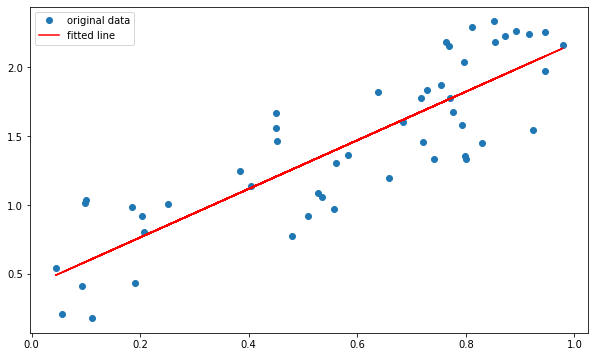

In [5]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Nonlinear Regression

* Nonlinear function between dependent and independent variables
    * Nonlinear operations (multiplication, power, etc.) between independent variables.
* Polynomial fitting
* polynomial regression is a linear model used for describing non-linear relationships.
    * Use the notion of the kernel
    * Define fixed nonlinear terms (powers and multiplications)
    * Transform input into the kernel/features space
    * Relation between coefficients and Nonlinear terms become linear
    * Can solve using a linear regressor

![image.png](fig1.png)

![image.png](fig2.png)

![image.png](fig3.png)


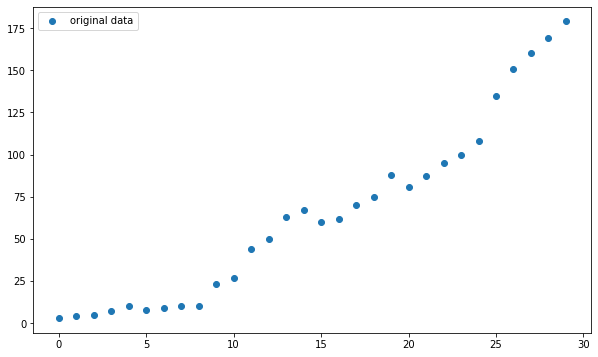

In [3]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='original data')
plt.legend()
plt.show()

## Polynomial Fitting Formula

$y = \sum_{i=0}^{n} a_i\times x^i$

Where $x^i$ s are the features and $a_i$ s are the corresponding coefficients we are looking for. 

### Linear Regression Formula (Recap)

$y = a \times x^1 + b \times x^0$

In [5]:
poly = PolynomialFeatures(degree=12, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

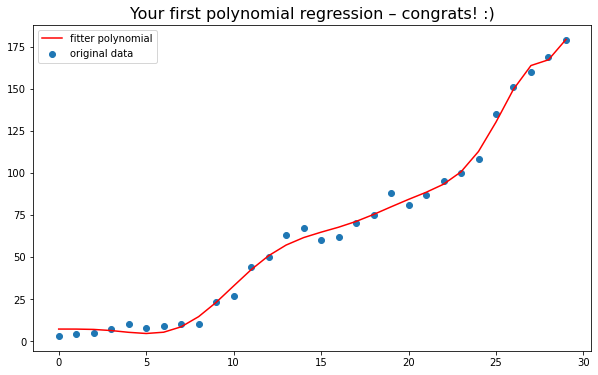

In [6]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y, label='original data')
plt.plot(x, y_predicted, c="red", label='fitter polynomial')
plt.legend()
plt.show()

## Example

AZMET air temperature data

In [8]:
data = pd.read_csv('data.csv')
data

,1,11.4,90
0,2,11.5,91.9
1,3,12.2,83.5
2,4,12.4,78.1
3,5,10.2,84.2
4,6,10.5,86.3
5,7,9.6,86.6
6,8,8.8,74.6
7,9,9.0,70.5
8,10,10.1,61.5
9,11,10.8,51.4


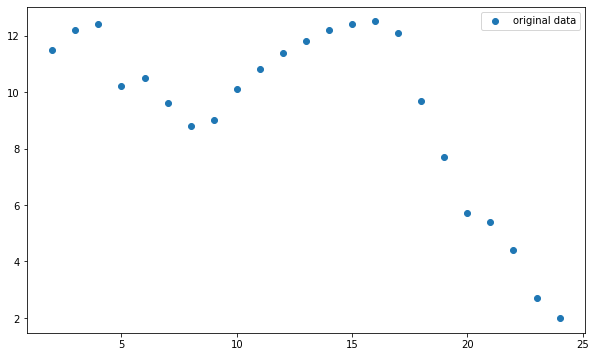

In [9]:
data_parsed = data.to_numpy()

plt.figure(figsize=(10,6))
plt.scatter(data_parsed[:,0], data_parsed[:,1], label='original data')
plt.legend()
plt.show()

[9.09564633]


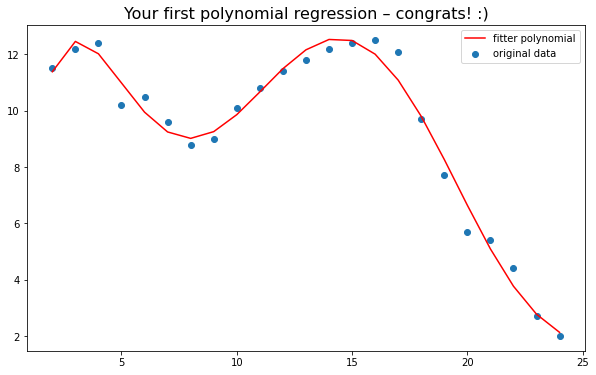

In [10]:
x = data_parsed[:,0]
y = data_parsed[:,1]

poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

print(poly_reg_model.predict(poly.fit_transform([[7.4]])))

plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y, label='original data')
plt.plot(x, y_predicted, c="red", label='fitter polynomial')
plt.legend()
plt.show()

## Overfitting

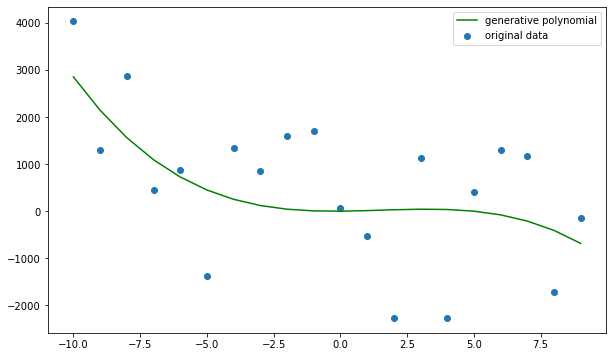

In [11]:
x = np.arange(-10, 10)
y = -2*x**3+9*x**2+5*x

noise_fac = 5000
noise = noise_fac*np.random.random(x.shape[0])-noise_fac/2

y_noisy = y+noise

plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label='original data')
plt.plot(x, y, c="green", label='generative polynomial')
plt.legend()
plt.show()

In [13]:
deg = 4

poly = PolynomialFeatures(degree=deg, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_noisy)

y_predicted = poly_reg_model.predict(poly_features)

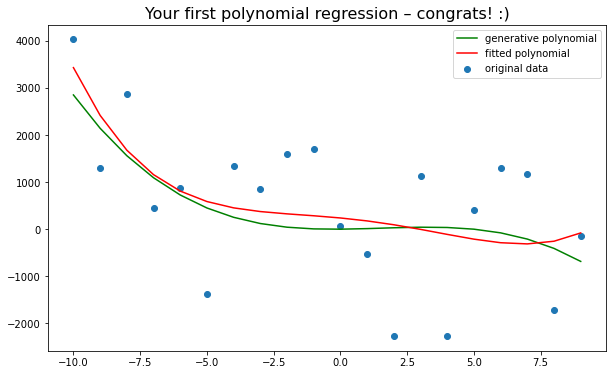

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y_noisy, label='original data')
plt.plot(x, y, c="green", label='generative polynomial')
plt.plot(x, y_predicted, c="red", label='fitted polynomial')
plt.legend()
plt.show()